In [18]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, brier_score_loss, roc_auc_score, average_precision_score
from sklearn.utils.estimator_checks import check_estimator

from msc import config
from msc.cache_handler import get_samples_df
from msc.estimators import BSLE
from msc.plot_utils import set_size
from msc.time_utils import SEC, MIN, HOUR


In [6]:
dataset_id = str(config["dataset_id"])
t_max = config["t_max"]

# load samples_df
samples_df = get_samples_df(dataset_id, with_events=True, with_time_to_event=True)

In [ ]:
horizons = [0, 5 * MIN, 10 * MIN, 15 * MIN, 20 * MIN, 25 * MIN, 30 * MIN, 35 * MIN, 40 * MIN, 45 * MIN, 50 * MIN, 55 * MIN, 60 * MIN]

In [7]:
for horizon in horizons:
    # add class
    samples_df["class"] = samples_df["time_to_event"].apply(
        lambda x: 1 if x <= horizon else 0
    )

    # add is_event
    samples_df["is_event"] = samples_df["time_to_event"].apply(
        lambda x: True if x == 0 else False
    )

    # split train/test
    samples_df["set"] = samples_df["time"].apply(
        lambda t: "train" if t < t_max else "test"
    )

    # get training event times
    train_events = samples_df.loc[
        (samples_df["is_event"]) & (samples_df["set"] == "train"), "time"
    ].to_numpy()
    # train_events = samples_df.loc[(samples_df['is_event']), 'time']

    # get embeddings
    train_X = np.stack(samples_df.loc[samples_df["set"] == "train", "embedding"])  # type: ignore
    test_X = np.stack(samples_df.loc[samples_df["set"] == "test", "embedding"])  # type: ignore
    test_y = samples_df.loc[samples_df["set"] == "test", "class"].to_numpy()
    test_times = samples_df.loc[samples_df["set"] == "test", "time"].to_numpy()

    # 


Text(0.5, 1.0, 'supervised')

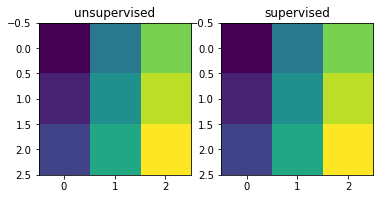

In [16]:
data =[[1, 5, 9], [2, 6, 10], [3, 7, 11]]
fig, axes = plt.subplots(1,2)
im = axes[0].imshow(data)
axes[0].set_title('unsupervised')
axes[1].imshow(data)
axes[1].set_title('supervised')

In [20]:
np.arange(0, 65, 5) * SEC

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])